In [36]:
from pygam import LinearGAM, s
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [74]:
with open('judges_annotated_data.pkl', 'rb') as f:
    data = pickle.load(f)

data = data[data['human_feedback'].notna() & data['human_feedback'].apply(lambda x: isinstance(x, dict) and 'score' in x)]
data = data[['scores', 'human_feedback']]
data['human_score'] = data['human_feedback'].apply(lambda x: x['score'])

In [38]:
X = data['scores'].apply(pd.Series)  # This converts each vector into a Series with 10 columns
X.columns = [f'score_{i}' for i in range(1, 11)]  # Name the columns score_0, score_1, ..., score_9
y = data['human_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
X

,score_1,score_2,score_3,score_4,score_5,score_6,score_7,score_8,score_9,score_10
uuid,,,,,,,,,,
dd107a11-0cef-469f-861d-1f6c378f616a,3.5,4.0,0.9,0.9,0.8,3.0,1.5,1.5,3.5,2.5
a8585e02-6395-4064-b053-6a5e6bf903c6,3.8,4.0,3.5,3.5,2.5,4.0,3.8,3.8,2.8,3.2
0eeb0570-8ba3-4844-b205-b1f1318cabf6,4.0,3.8,4.0,3.5,1.0,3.5,3.8,3.5,2.5,3.5
4fb95660-d3d2-482a-ab81-33c3f4171e26,4.0,4.0,3.0,3.5,2.5,3.5,3.5,3.5,2.5,3.5
f20121e8-f572-46bf-95b7-f8a988c6629f,3.5,3.8,1.5,1.5,2.5,2.5,2.0,2.5,2.5,0.5
...,...,...,...,...,...,...,...,...,...,...
2718ca11-0dd4-4baf-bc34-9ebe01eebc8d,2.0,4.0,2.5,1.0,0.8,4.0,2.0,0.8,0.9,0.8
d5663b6f-aafc-424c-a0cd-b85b7c87cfd8,3.5,3.8,1.5,1.5,1.5,3.5,1.5,2.5,1.5,1.0
eb37f5b2-4c4b-4de2-a173-86b5058755bd,4.0,3.5,3.0,4.0,2.0,3.8,3.7,3.8,2.5,3.0


In [39]:
gam = LinearGAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9))

In [40]:
gam.fit(X, y)

LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, 
   terms=s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + intercept,
   tol=0.0001, verbose=False)

In [41]:
score = gam.score(X_test, y_test)
score

0.5615576957324737

In [65]:
feature_labels = [
    "Harmlessness / Safety",
    "Privacy / PII Integrity",
    "Factual Accuracy",
    "Prompt Faithfulness / Relevance",
    "Calibration / Uncertainty Expression",
    "Bias & Fairness",
    "Reasoning Consistency",
    "Discourse Coherence",
    "Conciseness / Redundancy",
    "Stylistic & Formatting Fit"
]

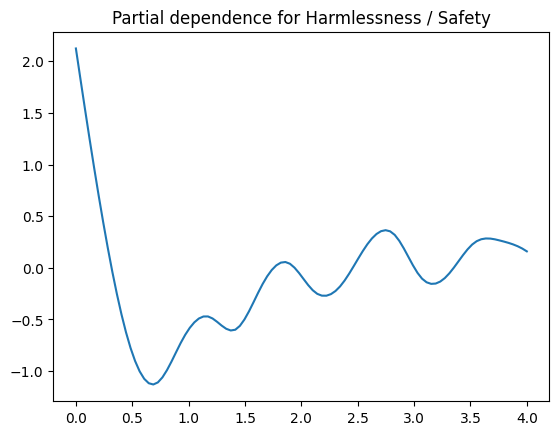

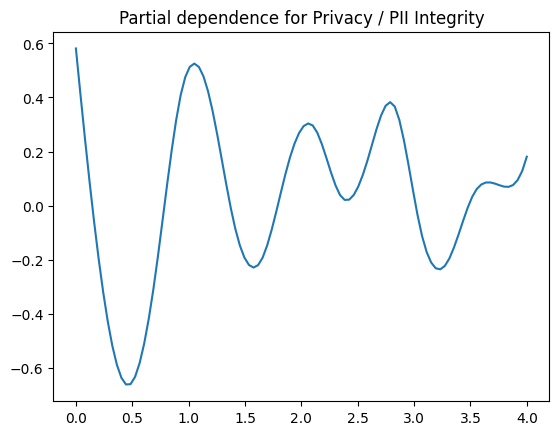

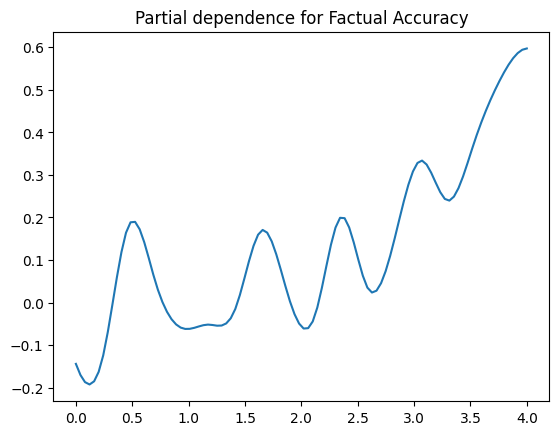

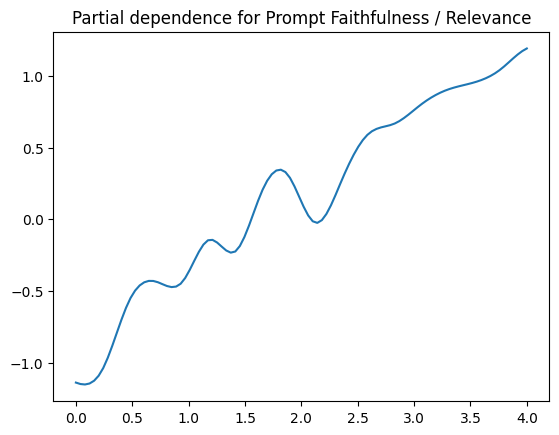

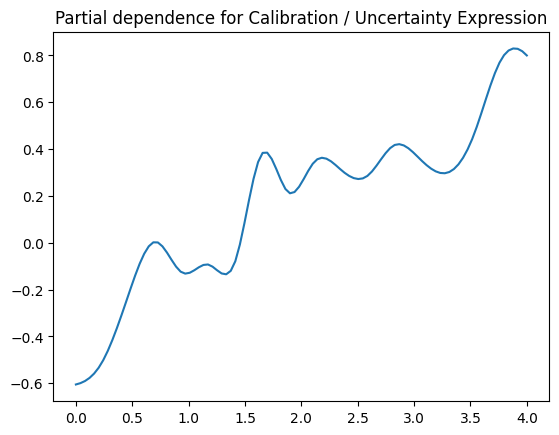

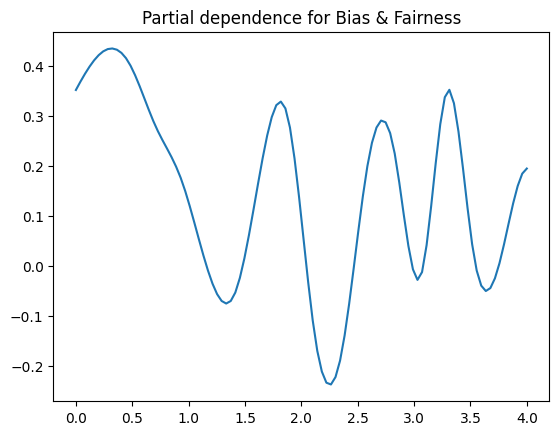

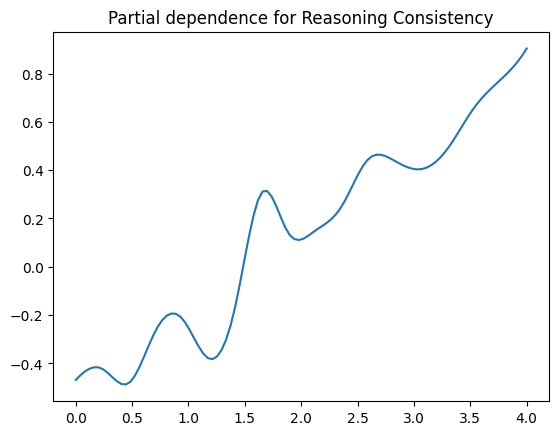

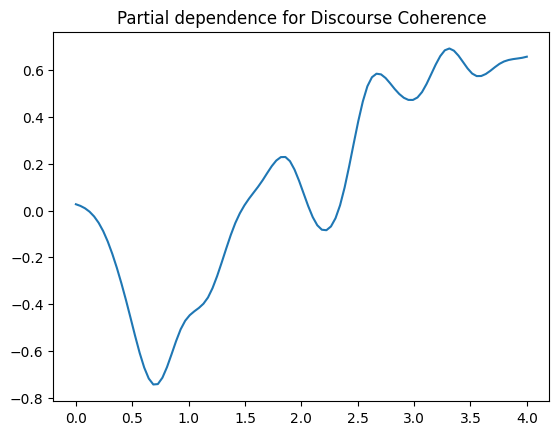

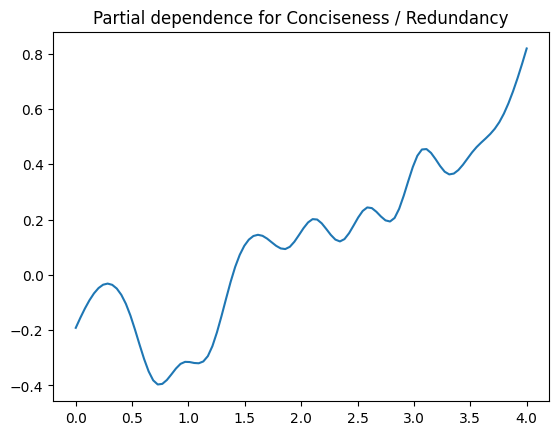

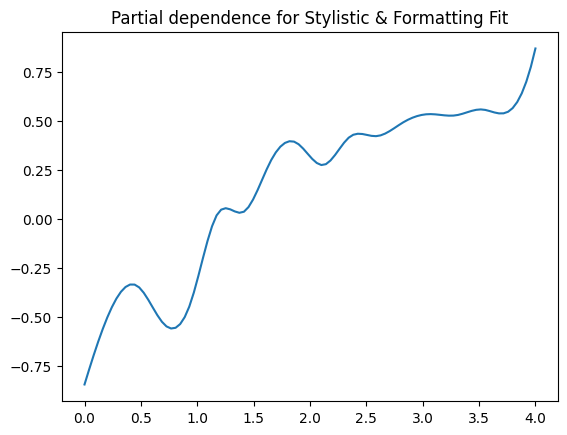

In [76]:
for i, term in enumerate(gam.terms):
    if term.isintercept:
        continue
    
    # Generate grid using actual data range
    XX = gam.generate_X_grid(term=i, meshgrid=False)
    # Or manually create the grid:
    # XX = np.linspace(feature_min, feature_max, 100).reshape(-1, 1)
    
    plt.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    plt.title(f'Partial dependence for {feature_labels[i]}')
    plt.show() 

In [64]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    127.8438
Link Function:                     IdentityLink Log Likelihood:                                -21419.0735
Number of Samples:                         9602 AIC:                                            43095.8346
                                                AICc:                                            43099.367
                                                GCV:                                                3.2569
                                                Scale:                                               3.179
                                                Pseudo R-Squared:                                   0.5611
Feature Function                  Lam

/tmp/ipykernel_473335/3358381670.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()
